# Projet Maths-Info

## Id-Benaddi Anisse & Leconte Simon

## Construction de lignes de niveaux pour une fonction à deux paramètres

On prend f une fonction définie dans le carré unité $[0,1]^2$ et on limite dans un premier temps notre recherche aux lignes de niveau qui possèdent un point sur l'arête gauche du domaine de définition.

### Amorce

À quelle condition raisonnable portant sur $f(0,0)$ et $f(0,1)$ et le réel $c$ est-on certain qu'il existe $t \in [0,1]$ tel que $f(0,t)=c$ ?

Pour des fonctions continues, $f(0,0) \leq c \leq f(0,1)$ ou $f(0,1) \leq c \leq f(0,0)$ est une hypothèse suffisante, bien que non nécessaire. Elle peut sembler à priori contraignante, mais la division de la zone d'étude en de suffisamment petites zones nous permet d'avoir cette condition vérifiée, sous réserve de comportements non extrêmes.

#### Implémentation d'une fonction renvoyant un flottant éloigné d'au plus eps d'un tel t ou None si la condition évoquée ci-dessus n'est pas satisfaite

In [4]:
import autograd
from autograd import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
def find_seed(g,c=0.0,eps=2**(-26)):
    a=0.0
    b=1.0
    if not(g(0,b)<c<g(0,a) or g(0,a)<c<g(0,b)):
        return None
    while abs(a-b)>eps:
        milieu = (a+b)/2
        if (g(0.0,milieu)<c) ^ (g(0,b)<g(0,a)):
            a=milieu
        else:
            b=milieu
    t=a
    return t

In [6]:
#Test
def g(x,y):
    return y
find_seed(g,0.31415926)

0.31415925920009613

### Propagation

Nous savons désormais trouver un point de départ pour notre tracé, il s'agit maintenant de prolonger ce tracé jusqu'à la sortie de l'espace délimité.

Nous utiliserons une méthode à base de gradient. Nous prolongerons le tracé en ligne droite dans la direction normale au gradient, opposée au début du tracé. Nous partirons nécessairement vers les $x$ croissants à la première étape, puis nous utiliserons un vecteur reliant le point à peine trouvé au point précédent. Le signe du produit vectoriel nous indique la direction à suivre.

In [7]:
def delta_normalisation(l,delta):
    """ Cette fonction prend en paramètre un gradient, et modifie sa norme de
    telle sorte qu'elle vaille delta en sortie """
    norme = np.sqrt(l[0]**2+l[1]**2)
    return l*delta/norme
def grad(f,x,y):
    """Cette fonction renvoit le gradient de f en (x,y)"""
    g=autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]
def simple_contour(f,c=0.0,delta = 0.01,eps = 2**(-26)):
    """ Entrée :
    Une fonction à deux paramètres réels à valeurs réelles : f
    Une valeur de ligne de niveau : c
    Un pas de propagation : delta
    Une précision pour la valeur initiale : eps

    Sortie :
    Deux listes de coordonnées des abscisses et des ordonnées de la ligne de
    niveau égale à c"""
    #Initialisation du tracé avec find_seed
    x0 = 0.0
    y0 = find_seed(f,c,eps)
    print(y0)
    if y0==None:
        return [],[]
    tabX = [x0]
    tabY = [y0]
    #Première étape, nécessairement vers les x croissants
    #Calcul du gradient
    gradient = grad(f,x0,y0)
    grad_utile = delta_normalisation(gradient,delta)
    # Il faut distinguer le cas grad_utile[1]>0 et le cas grad_utile[1]<0 pour
    # savoir quelle normale au gradient choisir
    b = grad_utile[1]
    a = grad_utile[0]
    if b>0:
        tabX.append(x0+b)
        tabY.append(y0-a)
    else:
        tabX.append(x0-b)
        tabY.append(y0+a)
    #La première étape est terminée
    #Tant que l'on est encore dans la case [0,1]², on continue à prolonger
    while 0<=tabX[-1]<=1 and 0<=tabY[-1]<=1:
        #On commence par calculer le gradient normalisé au dernier point
        gradient = grad(f,tabX[-1],tabY[-1])
        grad_utile = delta_normalisation(gradient,delta)
        b = grad_utile[1]
        a = grad_utile[0]
        deplacementPrecedent = (tabX[-2]-tabX[-1],tabY[-2]-tabY[-1])
        #On calcule le produit vectoriel entre le déplacement précédent et le
        #gradient actuel pour déterminer la direction de déplacement à l'étape
        #suivante
        vectoriel = deplacementPrecedent[0]*b-deplacementPrecedent[1]*a
        #Selon le signe du produit vectoriel, on détermine quelle normale au
        #gradient choisir
        if vectoriel > 0:
            tabX.append(tabX[-1]-b)
            tabY.append(tabY[-1]+a)
        else:
            tabX.append(tabX[-1]+b)
            tabY.append(tabY[-1]-a)
    return tabX,tabY

Testons cet algorithme à l'aide de différentes fonctions

0.9486832916736603


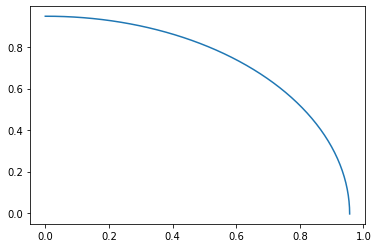

In [12]:
def f(x,y):
    return x**2+y**2
x,y=simple_contour(f,c=0.9)
plt.clf()
plt.plot(x,y)
plt.show()

0.9071067720651627


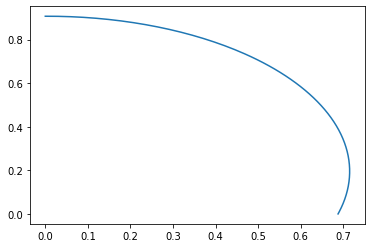

In [9]:
def f(x,y):
    return x**2+(y-0.2)**2
x,y=simple_contour(f,c=0.5)
plt.clf()
plt.plot(x,y)
plt.show()

0.4999999850988388


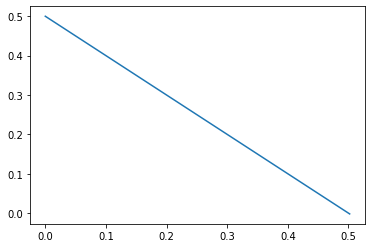

In [10]:
def f(x,y):
    return x+y
x,y=simple_contour(f,c=0.5)
plt.clf()
plt.plot(x,y)
plt.show()

Le principal défaut de cette fonction est qu'elle accumule les erreurs, étape après étape. Il faudra donc veiller dans la partie suivante à utiliser de nouveau la méthode de dichotomie de find_seed à chaque nouvelle case. Nous n'accumulerons de cette façon pas l'erreur sur tout le tracé du graphe, mais seulement sur une petite case, que l'on pourra rendre aussi petite que nécessaire. 

### Contour complexe